# Предобработка данных и построение моделей

In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import pandas as pd                 
import matplotlib.pyplot as plt      
plt.style.use('ggplot')             
%matplotlib inline     

In [6]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
target_var = 'quality'

In [60]:
df.isnull().sum()/len(df)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

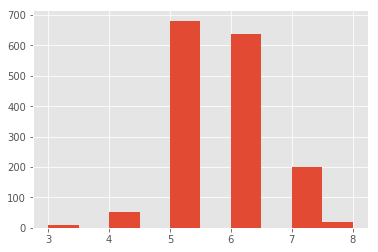

In [61]:
df.quality.hist();

In [62]:
y = df['quality'].values
X = df.drop('quality',axis=1).values
X.shape, y.shape

((1599, 11), (1599,))

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1119, 11) (1119,)
(480, 11) (480,)


In [64]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [65]:
from sklearn.linear_model import LogisticRegression
# объявляем модель
logit = LogisticRegression()
# обучаем на тренировочной выборке
logit.fit(X_train, y_train)
# предсказываем вероятности
logit.predict_proba(X_test)
# предсказываем сами метки классов
logit.predict(X_test)

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 7, 5, 6, 7, 5, 6, 6, 6, 6, 5, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 5,

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
y_predicted = logit.predict(X_test)
y_predicted
print('Accuracy =', accuracy_score(y_test, y_predicted))

Accuracy = 0.5625


In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(n_estimators=10) 
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)

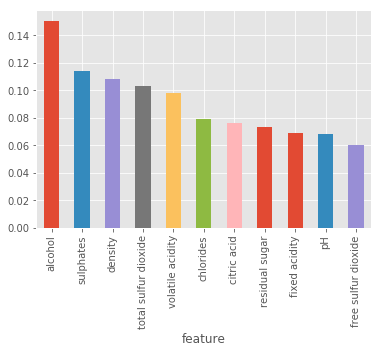

In [70]:
featureImportance = pd.DataFrame({"feature": df.drop('quality',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

In [71]:
print('Accuracy =', accuracy_score(y_test, y_predicted))

Accuracy = 0.6541666666666667


In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = {
              'n_estimators': [10,20,50,70,100],           
               'min_samples_leaf': [1, 3, 5, 7, 10],
             }


rfc = RandomForestClassifier(random_state=42)   

gcv = GridSearchCV(rfc, parameters, n_jobs= -1) 
gcv.fit(X, y)
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [74]:
y_predicted = gcv.predict(X_test)
y_proba = gcv.predict_proba(X_test)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        17
          5       0.81      0.87      0.84       195
          6       0.72      0.84      0.78       200
          7       0.83      0.48      0.60        61
          8       0.00      0.00      0.00         6

avg / total       0.73      0.77      0.74       480

